# Excersise 1

Implementation of Barbasi-Albert algorithm.

In [15]:
v0 = 4
end_time = 50 #how many iteration will be (V = 50 + 1)
number_of_new_edges = 2

In [ ]:
import random
import networkx as nx
import matplotlib.pyplot as plt

"""
end_time  – końcowa liczba wierzchołków,
v0 – liczba początkowych wierzchołków (v0 ≥ number_of_new_edges),
number_of_new_edges  – ile krawędzi dodajemy przy każdym nowym wierzchołku.
"""

# 1: graf startowy – pełny graf v0
G = {i: set() for i in range(v0)}
for i in range(v0):
    for j in range(i + 1, v0):
        G[i].add(j)
        G[j].add(i)

# Lista pomocnicza: każdy węzeł występuje tyle razy, ile wynosi jego stopień.
# Pozwala to losować z prawdopodobieństwem proporcjonalnym do stopnia.
degree_list = []
for node, neigh in G.items():
    degree_list += [node] * len(neigh)

# 2: iteracyjne dodawanie nowych węzłów
for new_node in range(v0, end_time):
    G[new_node] = set()

    # Wybór m unikalnych węzłów proporcjonalnie do stopnia
    targets = set()
    while len(targets) < number_of_new_edges:
        targets.add(random.choice(degree_list))

    # Dodawanie krawędzi
    for t in targets:
        G[new_node].add(t)
        G[t].add(new_node)

    # Aktualizacja degree_list
    degree_list += [new_node] * number_of_new_edges
    for t in targets:
        degree_list.append(t)




In [17]:
G

{0: {1, 2, 3, 5, 7, 10, 11, 18, 20, 21, 27, 30, 45},
 1: {0, 2, 3, 4, 6, 8, 9, 12, 16, 25, 43},
 2: {0, 1, 3, 13, 16, 19, 29, 32, 34, 38, 46},
 3: {0, 1, 2, 4, 5, 6, 7, 12, 14, 30, 31, 33, 34},
 4: {1, 3, 13, 18, 20, 35, 45},
 5: {0, 3, 8, 15, 22, 37, 49},
 6: {1, 3, 9, 10, 11, 23, 24, 25, 32, 38, 44},
 7: {0, 3, 14, 23, 24, 27, 29, 40, 48},
 8: {1, 5, 47},
 9: {1, 6, 22, 48},
 10: {0, 6},
 11: {0, 6, 15, 26, 28},
 12: {1, 3, 17, 19, 35, 36},
 13: {2, 4},
 14: {3, 7, 17, 36, 44},
 15: {5, 11, 21, 31},
 16: {1, 2},
 17: {12, 14, 28, 39},
 18: {0, 4, 43},
 19: {2, 12, 26},
 20: {0, 4, 41},
 21: {0, 15},
 22: {5, 9, 37},
 23: {6, 7},
 24: {6, 7},
 25: {1, 6},
 26: {11, 19},
 27: {0, 7},
 28: {11, 17, 33, 47},
 29: {2, 7, 40, 42},
 30: {0, 3, 46},
 31: {3, 15, 41},
 32: {2, 6},
 33: {3, 28},
 34: {2, 3},
 35: {4, 12},
 36: {12, 14, 39},
 37: {5, 22},
 38: {2, 6},
 39: {17, 36},
 40: {7, 29},
 41: {20, 31, 42},
 42: {29, 41},
 43: {1, 18},
 44: {6, 14},
 45: {0, 4, 49},
 46: {2, 30},
 47: {

# Excersise 2

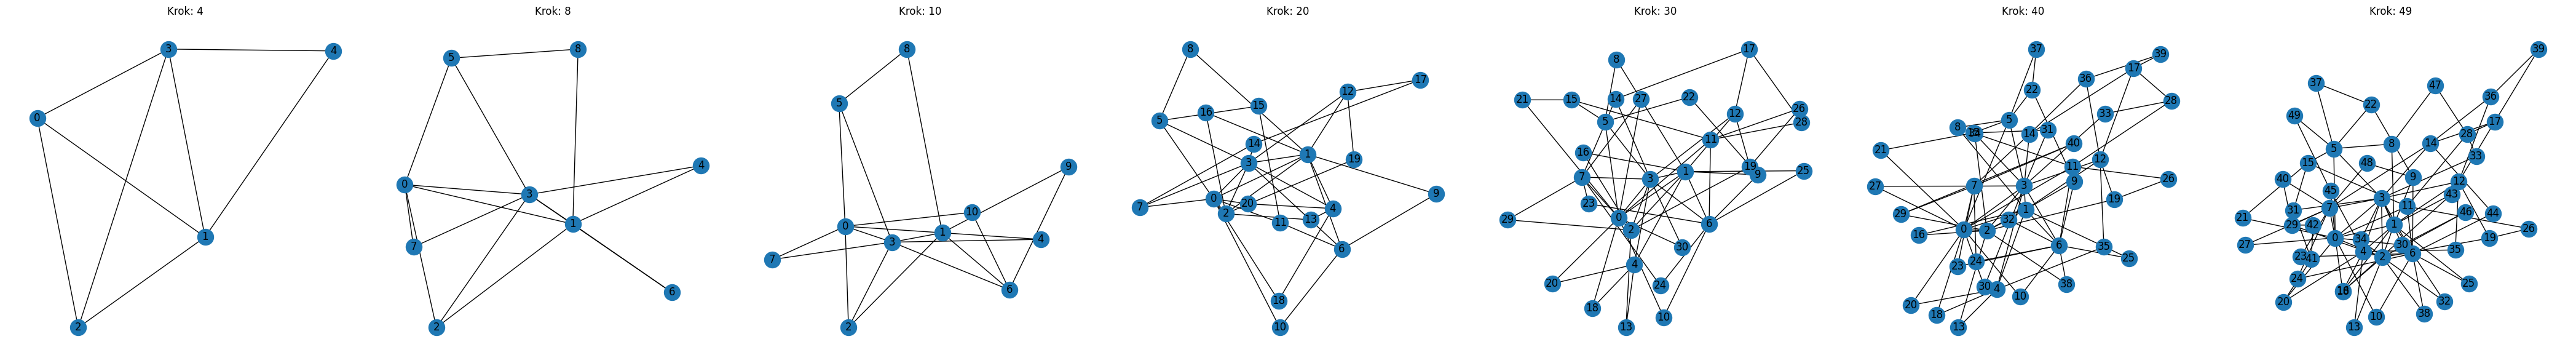

In [18]:
import networkx as nx
import matplotlib.pyplot as plt

def plot_selected_frames(G, steps=[4, 8, 10, 20, 30, 40, 49], figsize=(6,6)):
    """
    G: słownik {node: set(neighbors)}
    steps: lista węzłów, po których iteracjach chcemy zrobić snapshot
    """
    G_graph = nx.Graph()
    pos_holder = None  # pozycje layoutu, żeby zachować spójność

    # sortujemy węzły po numerze
    frames = list(sorted(G.items(), key=lambda x: x[0]))
    
    fig, axes = plt.subplots(1, len(steps), figsize=(len(steps)*figsize[0], figsize[1]))
    
    if len(steps) == 1:
        axes = [axes]  # dla jednokolumnowego subplotu

    step_idx = 0
    for i, (node, neighbors) in enumerate(frames):
        # dodaj węzeł i krawędzie
        G_graph.add_node(node)
        for t in neighbors:
            if G_graph.has_node(t):
                G_graph.add_edge(node, t)

        # jeśli aktualny węzeł odpowiada krokowi do pokazania
        if i in steps:
            ax = axes[step_idx]
            ax.set_title(f"Krok: {i}")
            
            if pos_holder is None:
                pos_holder = nx.spring_layout(G_graph, seed=42)
            else:
                pos_holder = nx.spring_layout(G_graph, pos=pos_holder, iterations=5, seed=42)
            
            nx.draw(G_graph, pos_holder, ax=ax, with_labels=True, node_size=350)
            step_idx += 1

    plt.tight_layout()
    plt.show()
plot_selected_frames(G)

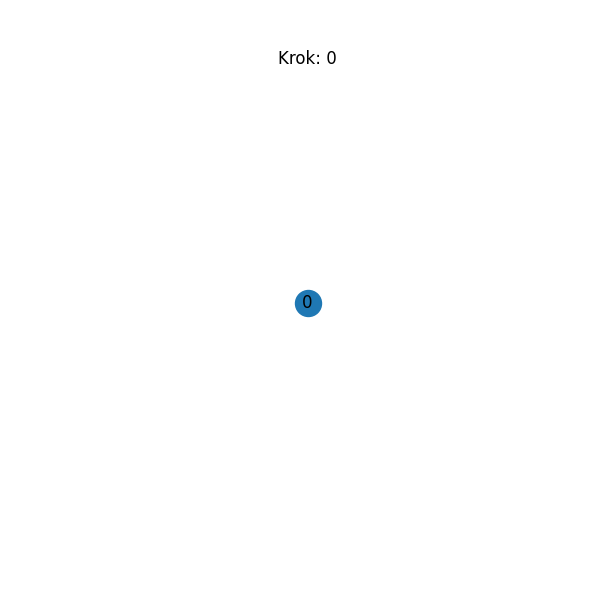

In [20]:
import random
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
from IPython.display import Image
def animate_graph_to_gif(G, filename="ba_animation.gif", interval=500):
    G_graph = nx.Graph()
    pos_holder = None
    frames = list(sorted(G.items(), key=lambda x: x[0]))
    
    fig, ax = plt.subplots(figsize=(6,6))
    
    def update(frame):
        nonlocal pos_holder
        node, neighbors = frame
        G_graph.add_node(node)
        for t in neighbors:
            if G_graph.has_node(t):
                G_graph.add_edge(node, t)
        
        ax.clear()
        ax.set_title(f"Krok: {node}")
        if pos_holder is None:
            pos_holder = nx.spring_layout(G_graph, seed=42)
        else:
            pos_holder = nx.spring_layout(G_graph, pos=pos_holder, iterations=5, seed=42)
        
        nx.draw(G_graph, pos_holder, ax=ax, with_labels=True, node_size=350)
    
    ani = FuncAnimation(fig, update, frames=frames, interval=interval, repeat=False)
    
    # zapisanie animacji do GIF
    ani.save(filename, writer=PillowWriter(fps=2))
    plt.close(fig)  # zamykamy figurę, żeby VSCode nie blokował
    
    # wyświetlenie w notebooku
    return Image(filename)


# --- 4. Tworzymy animację i wyświetlamy GIF ---
animate_graph_to_gif(G, filename="ba_animation.gif", interval=300)

# Excersise 3

In [ ]:
def degree_distribution(G, up_to=None):
    """
    G: dict {node: set(neighbors)}
    up_to: int, consider only nodes <= up_to-1
    Returns: list of degrees
    """
    if up_to is None:
        nodes = G.keys()
    else:
        nodes = [node for node in G.keys() if node < up_to]
    
    degrees = [len(G[node]) for node in nodes] # count deegree of each node based on the length of each key value
    return degrees


In [ ]:
def plot_degree_histogram(G, t=None, title=None):
    """
    G: dict graph
    t: number of nodes to consider (time t)
    """
    degrees = degree_distribution(G, up_to=t)
    
    plt.figure(figsize=(6,4))
    plt.hist(degrees, density=True, color='skyblue', edgecolor='black')
    plt.xlabel("Degree k")
    plt.ylabel("P(k)")
    if title is None:
        if t is None:
            plt.title("Degree distribution")
        else:
            plt.title(f"Degree distribution at t={t}")
    else:
        plt.title(title)
    plt.show()


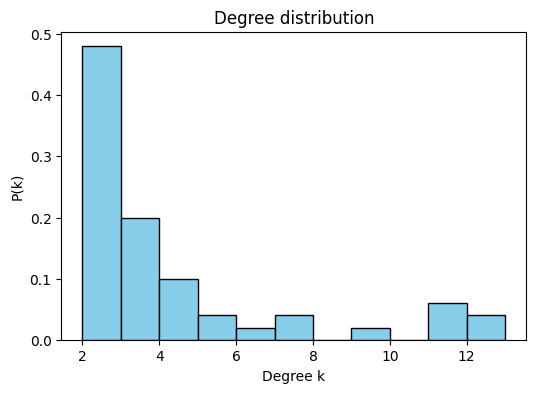

In [28]:
plot_degree_histogram(G)

In [29]:
def plot_degree_histogram2(G, t=None, bins='auto', title=None):
    """
    G: dict graph
    t: number of nodes to consider (time t)
    """
    degrees = degree_distribution(G, up_to=t)
    
    plt.figure(figsize=(6,4))
    plt.hist(degrees, color='skyblue', edgecolor='black')
    plt.xlabel("Degree of node")
    plt.ylabel("Number of nodes")
    if title is None:
        if t is None:
            plt.title("Degree distribution")
        else:
            plt.title(f"Degree distribution at t={t}")
    else:
        plt.title(title)
    plt.show()


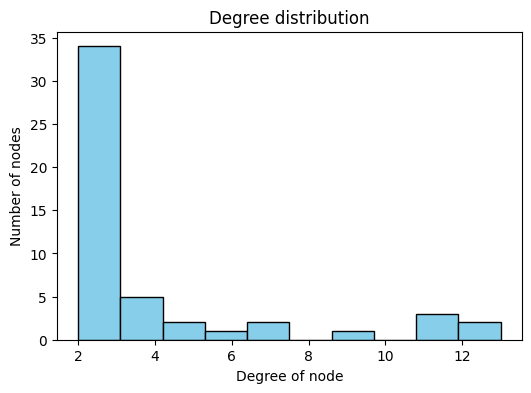

In [37]:
# Full graph at final time
plot_degree_histogram2(G)


In [59]:
x = [node for node in G.keys()]
y = [len(G[node]) for node in x]

Text(0, 0.5, 'Degree of vertex')

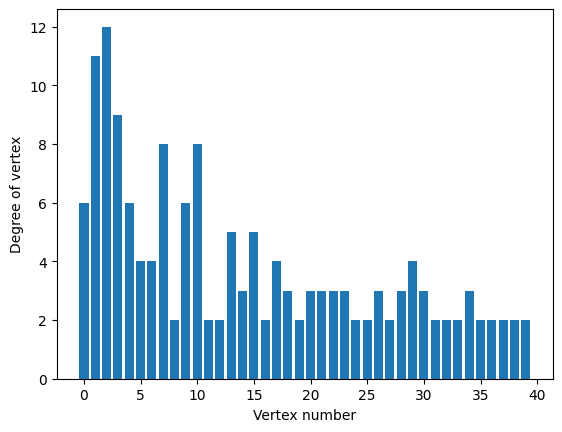

In [60]:
plt.bar(x, y)
plt.xlabel("Vertex number")
plt.ylabel("Degree of vertex")

# Excersise 4

In our lecture alfa coefficient is equal 1/2, cause: k_i(t) = m * sqrt(t/t_i), then k_i(t) ~ t ^(1/2).

In [78]:
import numpy as np
times = np.arange(1, end_time+1)
k_i = []
for i in times:
    k_i.append((number_of_new_edges * np.sqrt(len(times) / (i))))

mean_degree = np.mean(k_i)
print(f"Mean emphirical degree of i-th vertex: {mean_degree}")
print(f"Theoretical mean degree of i-th vertex for our case (time=50):{np.sqrt(50)}")

Mean emphirical degree of i-th vertex: 3.606916037053632
Theoretical mean degree of i-th vertex for our case (time=50):7.0710678118654755


In [ ]:
import numpy as np

# time steps (shifted to avoid log(0))
t_values = np.arange(1, end_time+1)

# empirical degrees
k0 = np.array(deg_node0)
k5 = np.array(deg_node5)

# log-log fit for node 0
log_t = np.log(t_values)
log_k0 = np.log(k0)
alpha0, C0 = np.polyfit(log_t, log_k0, 1)

# log-log fit for node 5
log_k5 = np.log(k5)
alpha5, C5 = np.polyfit(log_t, log_k5, 1)

print(f"Estimated alpha for node 0: {alpha0:.3f}")
print(f"Estimated alpha for node 5: {alpha5:.3f}")

# optional: plot log-log with fitted line
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.plot(log_t, log_k0, 'o', label='Node 0 (sim)')
plt.plot(log_t, alpha0*log_t + C0, '-', label=f'Fit alpha={alpha0:.2f}')
plt.plot(log_t, log_k5, 'o', label='Node 5 (sim)')
plt.plot(log_t, alpha5*log_t + C5, '-', label=f'Fit alpha={alpha5:.2f}')
plt.xlabel('log(t)')
plt.ylabel('log(k_i(t))')
plt.title('Log-log degree growth and fitted alpha')
plt.legend()
plt.show()


# Excersise 5

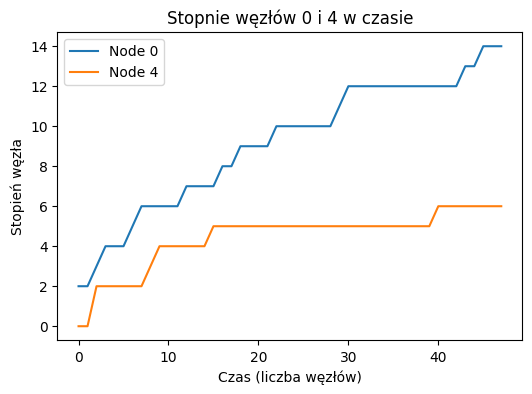

In [63]:
import random
import matplotlib.pyplot as plt

# parametry
v0 = 3
number_of_new_edges = 2
end_time = 50

# 1: startowy pełny graf
G = {i: set() for i in range(v0)}
for i in range(v0):
    for j in range(i+1, v0):
        G[i].add(j)
        G[j].add(i)

# lista pomocnicza do preferential attachment
degree_list = []
for node, neigh in G.items():
    degree_list += [node]*len(neigh)

# listy do śledzenia stopni wybranych węzłów
deg_node0 = [len(G[0])]
deg_node4 = [len(G[4]) if 4 in G else 0]

# 2: iteracyjne dodawanie nowych węzłów
for new_node in range(v0, end_time):
    G[new_node] = set()
    
    # wybór m unikalnych węzłów
    targets = set()
    while len(targets) < number_of_new_edges:
        targets.add(random.choice(degree_list))
    
    # dodawanie krawędzi
    for t in targets:
        G[new_node].add(t)
        G[t].add(new_node)
    
    # aktualizacja degree_list
    degree_list += [new_node]*number_of_new_edges
    for t in targets:
        degree_list.append(t)
    
    # zapis stopni wybranych węzłów
    deg_node0.append(len(G[0]))
    deg_node4.append(len(G[4]) if 4 in G else 0)

# 3: wykres stopni w czasie
plt.figure(figsize=(6,4))
plt.plot(range(end_time-2), deg_node0, label="Node 0")
plt.plot(range(end_time-2), deg_node4, label="Node 4")
plt.xlabel("Czas (liczba węzłów)")
plt.ylabel("Stopień węzła")
plt.title("Stopnie węzłów 0 i 4 w czasie")
plt.legend()
plt.show()


In [52]:
len(deg_node0)

38

In [74]:
import numpy as np
times = np.arange(1, end_time+1)
k_i = []
for i in times:
    k_i.append((number_of_new_edges * np.sqrt(len(times) / (i))))

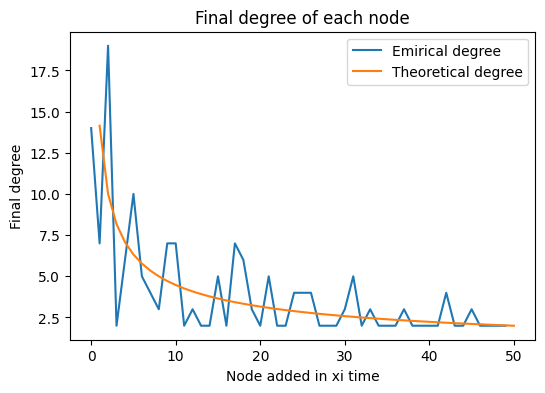

In [76]:
x = [node for node in G.keys()]
y = [len(G[node]) for node in x]

plt.figure(figsize=(6,4))
plt.plot(x, y, label = "Emirical degree")
plt.plot(times, k_i, label = "Theoretical degree")
plt.xlabel("Node added in xi time")
plt.ylabel("Final degree")
plt.title("Final degree of each node")
plt.legend()
plt.show()